In [14]:
#merge data from several states
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
trainval = pd.read_csv('./data/trainval_set_scoped.csv')
trainval.head()

,age,gender,size,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,log_adpt_time
0,Young,Male,Medium,True,False,True,True,False,True,NY,5.106551
1,Baby,Male,Medium,True,False,True,False,False,True,CA,2.949688
2,Baby,Male,Medium,True,False,True,True,False,True,NY,3.222868
3,Adult,Male,Large,True,False,True,False,False,True,TX,4.383276
4,Adult,Female,Medium,True,False,True,True,False,True,MN,2.493205


In [16]:
test = pd.read_csv('./data/test_set_scoped.csv')
test.head()

,age,gender,size,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,log_adpt_time
0,Adult,Male,Large,False,False,True,True,False,True,MN,3.716008
1,Adult,Female,Small,False,False,True,False,False,True,MN,3.640214
2,Baby,Male,Large,True,False,True,False,False,True,MN,3.558201
3,Adult,Male,Small,False,False,True,False,False,True,TX,4.128746
4,Young,Male,Medium,False,False,True,True,False,True,CA,3.933784


In [17]:
cat_col = ['age','gender','size','contact.address.state']
trainval[cat_col]=trainval[cat_col].astype('category')
test[cat_col]=test[cat_col].astype('category')

In [18]:
# Check for any missing data
print("Table size -", end=' ')
print(trainval.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (trainval.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
#missing_cols = [col for col in extension_data.columns
#                     if extension_train[col].isnull().any()]

Table size - (122772, 11)
Checking for missing values..
Series([], dtype: int64)


In [19]:
X_features = ['age', 'gender', 'size',
       'breeds.mixed', 'breeds.unknown',
       'attributes.spayed_neutered', 'attributes.house_trained',
       'attributes.special_needs', 'attributes.shots_current', 'contact.address.state']
trainval_X = trainval[X_features]
trainval_X.head()

,age,gender,size,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state
0,Young,Male,Medium,True,False,True,True,False,True,NY
1,Baby,Male,Medium,True,False,True,False,False,True,CA
2,Baby,Male,Medium,True,False,True,True,False,True,NY
3,Adult,Male,Large,True,False,True,False,False,True,TX
4,Adult,Female,Medium,True,False,True,True,False,True,MN


In [20]:
trainval_y = trainval['log_adpt_time']
trainval_y.head()

0    5.106551
1    2.949688
2    3.222868
3    4.383276
4    2.493205
Name: log_adpt_time, dtype: float64

In [21]:
trainval_y.min()

0.09531017980432492

In [22]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(trainval_X, trainval_y, test_size=0.2)
print('Training set size = {} and Validation set size = {}'.format(len(train_X),len(val_X)))

Training set size = 98217 and Validation set size = 24555


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
#pipeline_1 = Pipeline(steps=[('model', RandomForestRegressor(random_state=0))])
#pipeline_2 = Pipeline(steps=[('model', DecisionTreeRegressor(random_state=0))])
#pipeline_3 = Pipeline(steps=[('model', XGBRegressor(random_state=0))])

In [ ]:
#next few cells are just testing

In [ ]:
#testing out encoders

In [37]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_X[cat_col]))
OH_cols_val = pd.DataFrame(OH_encoder.transform(val_X[cat_col]))

In [39]:
# One-hot encoding removed index; put it back
OH_cols_train.index = train_X.index
OH_cols_val.index = val_X.index
rest_train = train_X.drop(cat_col, axis=1)
rest_val = val_X.drop(cat_col, axis=1)
OH_train_X = pd.concat([rest_train, OH_cols_train], axis=1)
OH_val_X = pd.concat([rest_val, OH_cols_val], axis=1)

In [42]:
rf = RandomForestRegressor(n_estimators=10, max_depth=5, n_jobs=-1)
rf_model = rf.fit(OH_train_X, train_y)
y_pred = rf_model.predict(OH_val_X)
mae_x=mean_absolute_error(val_y, y_pred)
mae_x

198.06307707707575

In [12]:
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
rf = RandomForestRegressor(n_estimators=10, max_depth=5, n_jobs=-1)
pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', rf)])
scores= -1 * cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='neg_mean_absolute_error')
print('Est: {} / Depth: {} ---- MAE: {}'.format(n_est,depth,round(scores.mean(), 3)))

Est: 10 / Depth: 10 ---- MAE: 196.655


In [ ]:
#main code starts here

In [24]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [27]:
def train_RF(n_est, depth):
    rf = RandomForestRegressor(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', rf)])
    #scores= -1 * cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='neg_mean_absolute_error')
    r2s= cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='r2')
    #print('Est: {} / Depth: {} ---- MAE: {} R^2: {}'.format(n_est,depth,round(scores.mean(), 3),round(r2s.mean(), 3)))
    print('Est: {} / Depth: {} ---- R^2: {}'.format(n_est,depth,round(r2s.mean(), 3)))

In [28]:
for n_est in [10, 50, 100]:
    for depth in [10, 50, 100]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- R^2: 0.098
Est: 10 / Depth: 50 ---- R^2: 0.087
Est: 10 / Depth: 100 ---- R^2: 0.087
Est: 50 / Depth: 10 ---- R^2: 0.098
Est: 50 / Depth: 50 ---- R^2: 0.088
Est: 50 / Depth: 100 ---- R^2: 0.089
Est: 100 / Depth: 10 ---- R^2: 0.099
Est: 100 / Depth: 50 ---- R^2: 0.089
Est: 100 / Depth: 100 ---- R^2: 0.089


In [73]:
train_X

,age,gender,size,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state
41254,Young,Male,Small,True,False,True,False,False,True,NY
69024,Baby,Male,Small,False,False,False,False,False,True,CA
109856,Adult,Female,Medium,True,False,True,True,False,True,MN
60535,Young,Male,Medium,True,False,True,True,False,True,TX
95078,Adult,Female,Medium,True,False,True,True,False,True,MN
84503,Adult,Female,Large,False,False,True,False,False,False,MN
21702,Adult,Male,Large,False,False,True,False,False,True,CA
17294,Young,Female,Large,False,False,True,True,False,True,TX
21343,Baby,Male,Medium,False,False,True,False,False,True,NY
68691,Baby,Male,Small,True,False,False,True,False,True,TX


In [19]:
def train_DT(n_est, depth):
    rf = DecisionTreeRegressor(min_samples_split=mss, max_depth=depth,n_jobs=-1)
    pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', rf)])
    scores= -1 * cross_val_score(pipeline_temp, trainval_X, trainval_y,cv=5,scoring='neg_mean_absolute_error')
    print('MSS: {} / Depth: {} ---- MAE: {}'.format(n_est,depth,round(scores.mean(), 3)))

In [20]:
for mss in [2, 5, 10]:
    for depth in [10, 50, 100]:
        train_DT(mss, depth)

Est: 2 / Depth: 10 ---- MAE: 95.435
Est: 2 / Depth: 50 ---- MAE: 95.535
Est: 2 / Depth: 100 ---- MAE: 95.539
Est: 5 / Depth: 10 ---- MAE: 95.436
Est: 5 / Depth: 50 ---- MAE: 95.508
Est: 5 / Depth: 100 ---- MAE: 95.504
Est: 10 / Depth: 10 ---- MAE: 95.413
Est: 10 / Depth: 50 ---- MAE: 95.44
Est: 10 / Depth: 100 ---- MAE: 95.441


In [ ]:
#model validation

In [29]:
import time
from sklearn.metrics import r2_score
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(oh.fit_transform(train_X[cat_col]))
OH_cols_val = pd.DataFrame(oh.transform(val_X[cat_col]))
OH_cols_train.index = train_X.index
OH_cols_val.index = val_X.index
rest_train = train_X.drop(cat_col, axis=1)
rest_val = val_X.drop(cat_col, axis=1)
OH_train_X = pd.concat([rest_train, OH_cols_train], axis=1)
OH_val_X = pd.concat([rest_val, OH_cols_val], axis=1)

In [25]:
OH_train_X.head()

,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,0,1,2,3,...,5,6,7,8,9,10,11,12,13,14
67781,True,False,False,False,False,True,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8064,False,False,True,True,False,True,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
22118,True,False,True,True,False,True,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
60056,True,False,False,False,False,True,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
70138,True,False,True,True,False,True,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [30]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1)
start = time.time()
rf_model = rf.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

Fit time: 6.571 / Predict time: 0.244 ---- MAE: 0.861 / R^2: 0.094


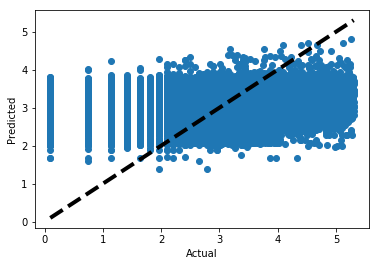

In [31]:
fig, ax = plt.subplots()
ax.scatter(val_y, y_pred)
ax.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [28]:
rf = RandomForestRegressor(n_estimators=10, max_depth=10, n_jobs=-1)

start = time.time()
rf_model = rf.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

Fit time: 1.03 / Predict time: 0.16 ---- MAE: 95.866 / R^2: 0.076


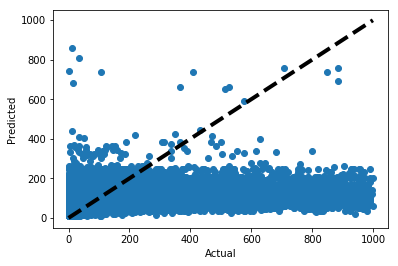

In [29]:
fig, ax = plt.subplots()
ax.scatter(val_y, y_pred)
ax.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [30]:
from xgboost import XGBRegressor
rf = XGBRegressor(n_estimators=10, max_depth=10, n_jobs=-1)

start = time.time()
rf_model = rf.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:52:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fit time: 1.855 / Predict time: 0.097 ---- MAE: 82.995 / R^2: 0.032


In [33]:
from xgboost import XGBRegressor
xg = XGBRegressor(n_estimators=100, max_depth=10, n_jobs=-1)

start = time.time()
xg_model = xg.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = xg_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fit time: 13.329 / Predict time: 0.161 ---- MAE: 0.863 / R^2: 0.088


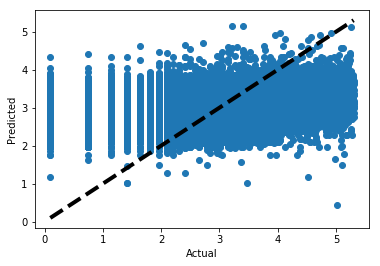

In [34]:
fig, ax = plt.subplots()
ax.scatter(val_y, y_pred)
ax.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [36]:
rf_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [59]:
#import pickle
#filename = 'finalized_model_demo.sav'
#pickle.dump(model, open(filename, 'wb'))

#filename = 'finalized_model_demo.sav'
#loaded_model = pickle.load(open(filename, 'rb'))
#test pickle
#from sklearn.metrics import mean_absolute_error
#extension_preds = loaded_model.predict(test_X)
#mae_x=mean_absolute_error(test_y, extension_preds)
#print('The mean absolute error is {} which is about {:.2%} of the mean extension'.format(mae_x,(mae_x/mean_x_total)))

NameError: name 'scores' is not defined

In [37]:
import pickle
filename = './models/xgmodel_log11.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [39]:
print(rf_model.feature_importances_)

[0.00620394 0.         0.01080767 0.0602794  0.0303268  0.01409789
 0.00573992 0.57708657 0.01201466 0.02201728 0.00382385 0.00777086
 0.01171798 0.00695846 0.00657776 0.00543241 0.07990446 0.06619652
 0.02801088 0.02444156 0.02059113]


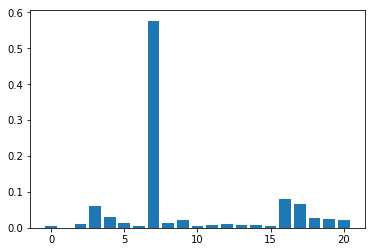

In [40]:
plt.bar(range(len(rf_model.feature_importances_)), rf_model.feature_importances_)
plt.show()

In [43]:
OH_train_X.head()

,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,0,1,2,3,...,5,6,7,8,9,10,11,12,13,14
41254,True,False,True,False,False,True,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
69024,False,False,False,False,False,True,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
109856,True,False,True,True,False,True,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
60535,True,False,True,True,False,True,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
95078,True,False,True,True,False,True,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [44]:
#Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

start = time.time()
lr_model = lr.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = lr_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

Fit time: 0.243 / Predict time: 0.028 ---- MAE: 0.876 / R^2: 0.069


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
params = {'alpha': [0.001, 0.01, 0.1, 1, 5, 10]}
ridge_regressor = GridSearchCV(ridge, params, scoring='r2', cv=5)
ridge_regressor.fit(OH_train_X, train_y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 10}
0.06972839584829206


In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso()
params = {'alpha': [1e-10, 1e-5, 1e-3, 1, 10, 30]}
lasso_regressor = GridSearchCV(lasso, params, scoring='r2', cv=5)
lasso_regressor.fit(OH_train_X, train_y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

C:\anaconda_python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\anaconda_python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\anaconda_python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\anaconda_python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

{'alpha': 10}
0.06972839584829206


C:\anaconda_python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [50]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-05}
0.06973029023361599


In [ ]:
#Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()

start = time.time()
lr_model = lr.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = lr_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

In [57]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [60]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(alphas=alphas, scoring='r2', normalize=True)
rcv.fit(OH_train_X, train_y)
rcv.alpha_

0.005

In [63]:
ridgemodel = Ridge(alpha = rcv.alpha_, normalize = True)
ridgemodel.fit(OH_train_X, train_y)
y_pred = ridgemodel.predict(OH_val_X)
r2 =r2_score(val_y,y_pred)
r2

0.06922171956313983

In [64]:
pd.Series(ridgemodel.coef_, index = OH_val_X.columns)

breeds.mixed                  0.011778
breeds.unknown                0.000000
attributes.spayed_neutered    0.044283
attributes.house_trained      0.238269
attributes.special_needs      0.432499
attributes.shots_current      0.099156
0                             0.169981
1                            -0.276809
2                             0.352069
3                             0.083693
4                             0.001179
5                            -0.001202
6                             0.027061
7                            -0.074519
8                             0.113026
9                             0.050514
10                           -0.120750
11                           -0.109579
12                            0.034705
13                            0.005263
14                            0.065023
dtype: float64

In [66]:
from sklearn.linear_model import LassoCV
lcv = LassoCV(alphas=alphas, max_iter=100000, normalize=True)
lcv.fit(OH_train_X, train_y)
lcv.alpha_

C:\anaconda_python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


5000000000.0

In [70]:
lmodel = Lasso(alpha = 0.005, max_iter=100000, normalize = True)
lmodel.fit(OH_train_X, train_y)
y_pred = lmodel.predict(OH_val_X)
r2 =r2_score(val_y,y_pred)
r2

-0.00012802684020307709

In [72]:
len(train_y)

98217

In [51]:
#Ridge regression
from sklearn.linear_model import Ridge
rr = Ridge()

start = time.time()
rr_model = rr.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rr_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

Fit time: 0.158 / Predict time: 0.029 ---- MAE: 0.876 / R^2: 0.069
